## Introduction : ⚜️ The Hitchhiker's Guide to the Kaggle Galaxy

> Road to Kaggle Grandmaster!!

Hi, I'm a semi-newbie who loves kaggle :)

First, I would like to thank the Kaggle team and the Kagglers for conducting this survey. I am happy to be able to analyze these data.

I've been preparing for an algorithm competition (such as ICPC) for about three years, and it's been about a year since I entered the DS/ML field.
I love the sharing culture of AI, so I have some community managers in Korea, and I have a [Facebook page](https://www.facebook.com/AI.Lookbook).

![AI Lookbook Background Image](https://i.imgur.com/RZ1lkih.png)
> My Facebook Page Background, made by me :)

I'm going to analyze / visualize `what I'd be curious about as a newbie Kaggler. I am analyzing what I was wondering about, what frameworks are some people doing, and what frameworks are they using?`

I'm not as good at English as a native speaker. Therefore, I will replace some of the articles with highly readable visualizations.

**Invites you to a world of interactive and unusual visualizations.**

**Please enjoy my kernel!!**

![fun](https://media3.giphy.com/media/xT0BKiK5sOCVdBUhiM/source.gif)
> img from https://giphy.com/gifs/friends-nick-at-nite-xT0BKiK5sOCVdBUhiM

--- 

### Table of Contents


1. Simple Distribution (**Age, Gender, Country**)
    - *Age & Gender*
    - *Gender & Country*
        - *Thinking About Gender imbalance*
2. Which **Algorithm** Is Most Popular?
3. How About **Machine Learning Frameworks & Tools**?
    - *Correlation between Algorithm & Tools*
    - *Relationship between structured data and unstructured data*
4. How About Popularity of Kaggler's **Programming Language?**
5. What is the relationship between **ML Career and Language recommendations**?
6. What is the relationship between **Programming Career and Language recommendations**?
7. Personal thoughts about the **visualization library**
    - my experience & introduce visualization library
8. What kind of **DB** do people use? 
9. How about Kaggler's **development environment** like?
    - *IDE*
    - *Notebook*
10. What kind of **Jobs** do Kagglers have? What is their **educational background**?
    - *Jobs & Education*
    - *Jobs & Language*
    - *Jobs & ML Framework*
11. Is **salary** high depending on **career**? How about **educational background**?
    - *Career & Salary*
    - *Education & Salary*
12. How about **Gender, Age, Country & Salary**?
    - *Age & Salary*
    - *Gender & Salary*
        - *Gender wage inequality*
    - *Country & Salary*
13. Where is the **Best Source to study** machine learning?
    - *Favorite Source*
    - *Best Source*
14. Who **paid** a lot?
    - *Gender & Spending*
    - *Age & Spending*

In [1]:
# default
import numpy as np 
import pandas as pd 
import os

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import networkx as nx
import plotly.graph_objects as go

# read file
question = pd.read_csv('../input/kaggle-survey-2019/questions_only.csv')
schema = pd.read_csv('../input/kaggle-survey-2019/survey_schema.csv')
multiple_choice = pd.read_csv('../input/kaggle-survey-2019/multiple_choice_responses.csv')
other_text =  pd.read_csv('../input/kaggle-survey-2019/other_text_responses.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.



In [2]:
# check the question list & return the survey answers
# 'QXX' is format of `s`
from IPython.core.display import display, HTML

def q_list(s):
    lst = []
    for i in multiple_choice.columns:
        if i[:3]==s:
            lst.append(i)
    df = multiple_choice[lst]

    df_sub = df.iloc[0].apply(lambda x: ''.join(x.split('-')[2:]))
    q = ''.join([f'<li>{i}</li>' for i in df_sub.values])
    display(HTML(f'<div style="background: #f7f5f5; padding: 10px; border-radius: 10px;"> <h3 style="color:#20639B; padding:10px">{s} : {question.T[0][int(s[1:])]} </h3><ol>{q}</ol> <div>'))
    return df, df_sub

Before we start our analysis, let's see what questions are attractive.

In [3]:
q = ''.join([f'<li>{i}</li>' for i in question.T[0][1:]])
display(HTML(f'<div style="background: #f6f4f4; padding: 10px; border-radius: 10px;">  <h2 style="color:#20639B; padding:10px"> Question List</h2><ol>{q}</ol> </div>'))

And this is distribution of # of sub-questions.

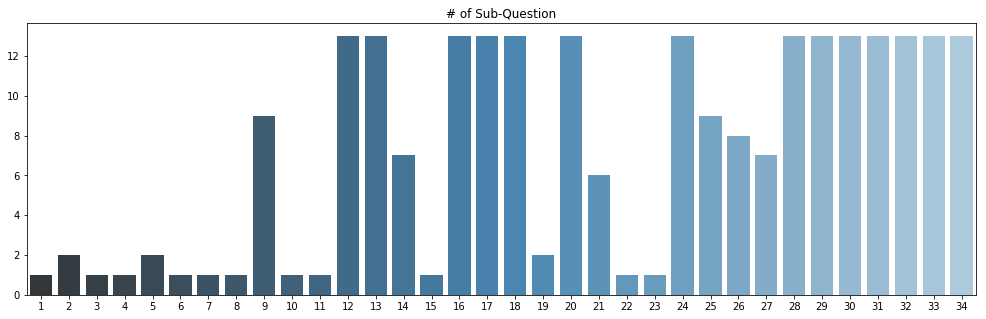

In [4]:
lst = []
for i in multiple_choice.columns[1:]:
    lst.append(i.split('_')[0])
lst = pd.Series(lst).apply(lambda x : int(x[1:]))
cnt = lst.value_counts().sort_index()

fig, ax = plt.subplots(1,1,figsize=(17,5))
sns.barplot(cnt.index, cnt, palette="Blues_d", ax=ax)
ax.set_title('# of Sub-Question')
plt.show()

## 1. Simple Distribution (Age, Gender, Country)

### About Q1, Q2, Q3

- Q1. What is your age (# years)?
- Q2. What is your gender? - Selected Choice
- Q3. In which country do you currently reside?


Let's look at a simple distribution first.

What kind of distribution does Kagler have? 

I have an [AI-related Facebook page](https://web.facebook.com/AI.Lookbook) with about 2000 followers in Korea and compare it lightly with the distribution.


In [5]:
dist = multiple_choice[['Q1', 'Q2', 'Q3']]
dist = dist.rename(columns={"Q1": "Age", "Q2": "Gender", "Q3":"Country"})
dist.drop(0, axis=0, inplace=True)

In [6]:
!pip install pywaffle

     |████████████████████████████████| 532kB 2.8MB/s 


The gender distribution is as follows:

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



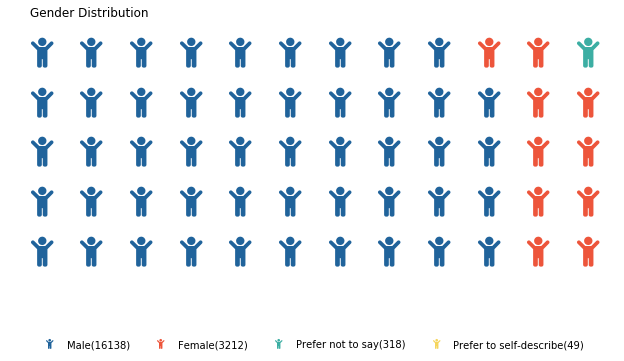

In [7]:
from pywaffle import Waffle

gender = dist['Gender'].value_counts()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=12,
    values=gender,
    colors = ('#20639B', '#ED553B', '#3CAEA3', '#F5D55C'),
    title={'label': 'Gender Distribution', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(gender.index, gender) ],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(dist), 'framealpha': 0},
    font_size=30, 
    icons = 'child',
    figsize=(12, 5),  
    icon_legend=True
)

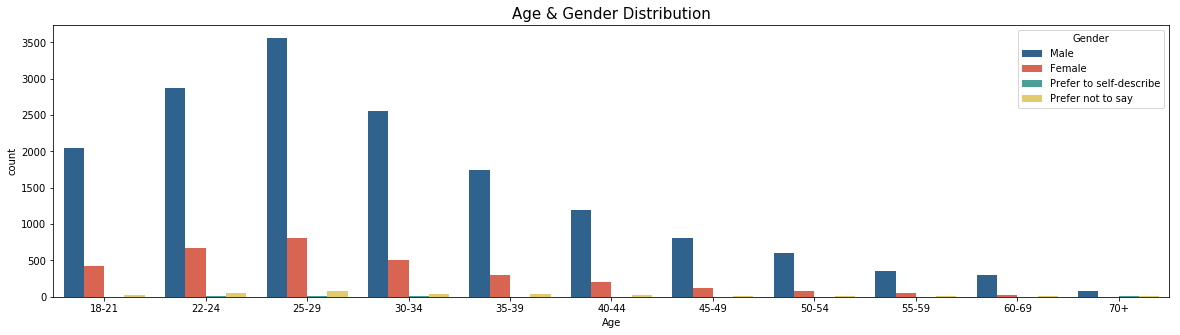

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

sns.set_palette(sns.color_palette(['#20639B', '#ED553B', '#3CAEA3', '#F5D55C']))

sns.countplot(x='Age', hue='Gender', data=dist, 
              order = dist['Age'].value_counts().sort_index().index, 
              ax=ax )

plt.title('Age & Gender Distribution', size=15)
plt.show()

In [9]:
# Age & Gender's distribution
dist_age = dist[['Gender', 'Age']].groupby('Age')['Gender'].value_counts().unstack()

for i in dist_age.columns:
    dist_age[i] = dist_age[i].apply(lambda x : x/gender[i])

top_labels = sorted(dist['Age'].unique())

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)','rgba(190, 192, 213, 0.95)',
          'rgba(190, 192, 213, 0.90)','rgba(190, 192, 213, 0.85)',
          'rgba(190, 192, 213, 0.80)','rgba(190, 192, 213, 0.75)',
          'rgba(190, 192, 213, 0.70)','rgba(190, 192, 213, 0.65)',
          'rgba(190, 192, 213, 0.60)']

x_data = dist_age.T.values.round(2)

y_data = ['Female',
          'Male',
          'Prefer not to say',
          'Prefer to self-describe']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(
    title="Age ratio distribution by gender",
    annotations=annotations)

fig.show()

I can certainly see that the proportion of female is lower than that of male.

The distribution of my Facebook page is:

![img](https://i.imgur.com/00tja7U.png)

Both data vary by about 5 to 6 times, depending on gender.

This distribution corresponds to the entire engineering world, including AI.

I hope to see more female AI researchers.



In [10]:
y = dist.Country.value_counts()

fig = go.Figure(go.Treemap(
    labels = y.index,
    parents = ['World'] * len(y),
    values = y
))

fig.update_layout(title = '# of Survey Participants')
fig.show()

India and USA are overwhelming compared to other countries.
It's almost the opposite of Earth, but it's fun, although it's not special. (It reminds me of Sheldon and Rajesh of the *Big Bang Theory*.)


![bigbang](https://media.giphy.com/media/SXJfIASq4Ayxq/giphy.gif)
> img from https://giphy.com/gifs/the-big-bang-theory-sheldon-cooper-jim-parsons-SXJfIASq4Ayxq

Let's look at the map and graph of the ratio of men and women by country.

In [11]:
dist_ratio = dist.groupby('Country')['Gender'].value_counts().unstack().fillna(0)
dist_ratio['Female/Male'] = dist_ratio['Female'] / dist_ratio['Male']

print('Average female / male ratio')
print(sum(dist_ratio['Female']) / sum(dist_ratio['Male']))

Average female / male ratio
0.1990333374643698


In [12]:
dist_ratio['Country'] = dist_ratio.index
fig = px.choropleth(dist_ratio, locations='Country',
                    locationmode='country names',
                    color="Female/Male",
                    color_continuous_scale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]])
fig.update_layout(title="Female to male Ratio")
fig.show()

In [13]:
from plotly.subplots import make_subplots

import numpy as np

x = dist.Country.value_counts().index[:7]

y_saving = dist.groupby('Country').count().loc[x]['Gender']
y_net_worth = dist_ratio.loc[x]['Female/Male']



x = dist.Country.value_counts().index[:7]

# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y_saving,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Survey Participants',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y_net_worth, y=x,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Female / male ratio',
), 1, 2)

fig.update_layout(
    title='Top 7 Participants by Country',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
        dtick=1000
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=0.05,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(y_saving, decimals=2)
y_nw = np.round(y_net_worth, decimals=4)

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn+0.03,
                            text='{:,}'.format(ydn) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 200,
                            text=str(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text='Most countries with a lot of participants can see that the female / male ratio is below the average.',
                        font=dict(family='Arial', size=10, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

Although this survey is not necessarily accurate, it is clear that there is a problem.

Although the proportion of women is small, it tends to be lower with age. This seems like a career break, which is a shame.

Countries with less than 20% of the rate would be better off working on this. I hope to get closer to 50% in the future.

##  2. Which Algorithm is most popular? 

> Q24. Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice

I've always been heard that many GBM models are used, and I haven't seen any statistics on them.

I can check it on this occasion.

First, let's look at the options in question 24.

In [14]:
q24_df, q24_sub = q_list('Q24')

In [15]:
q24_df.drop(0, axis=0, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



It is expected to be a fairly sparse table.

In [16]:
q24_convert = {b:a for a, b in zip(q24_sub.values, q24_df.columns)}
q24_df.rename(columns=q24_convert, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



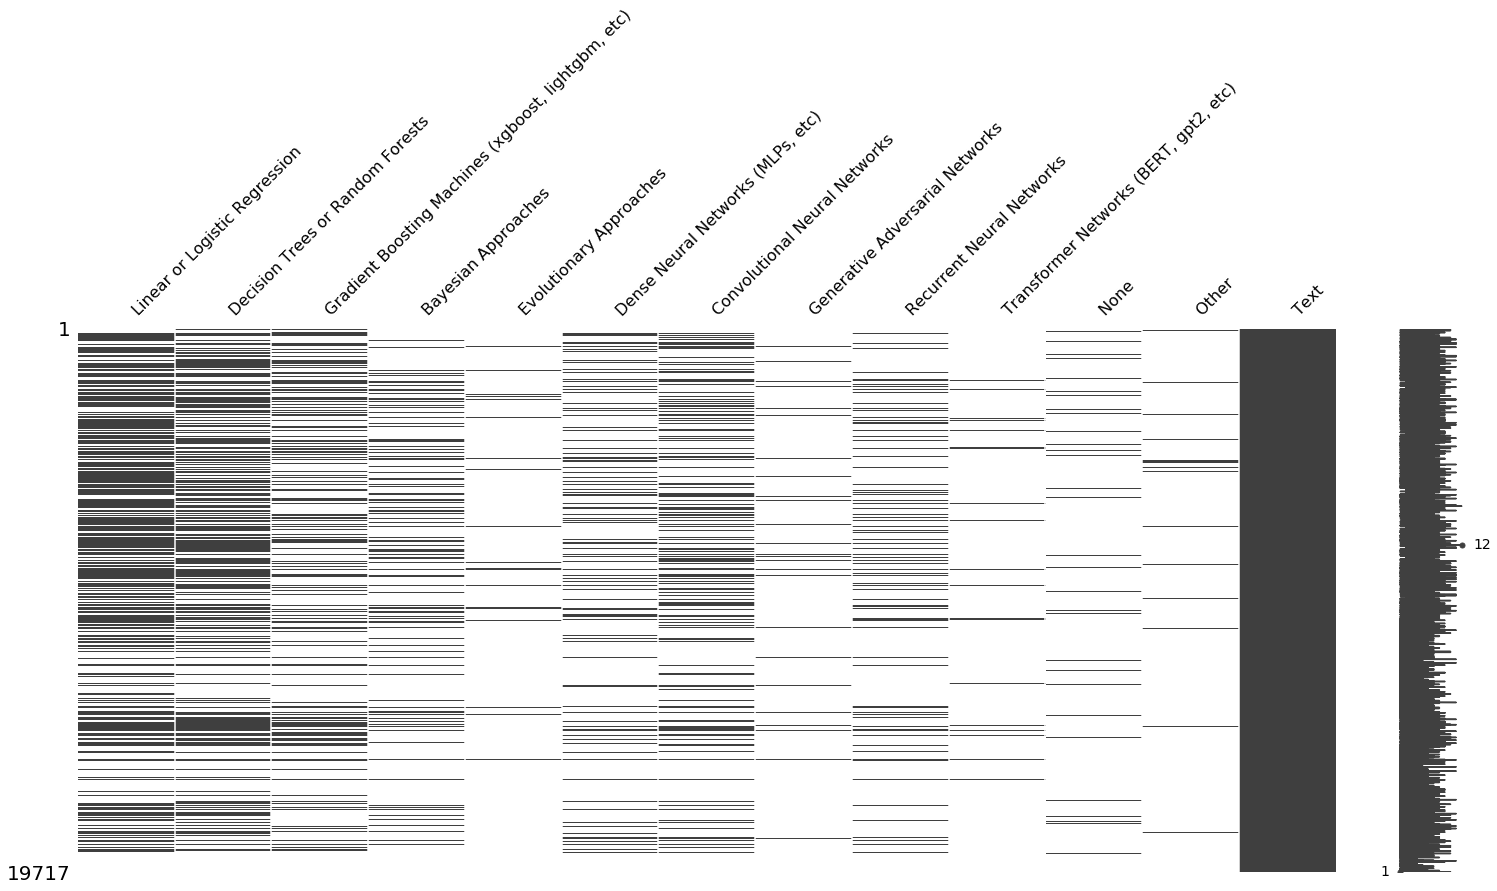

In [17]:
msno.matrix(q24_df)

At first glance, Linear / Logistic Regression is the most.
Let's sort it out.

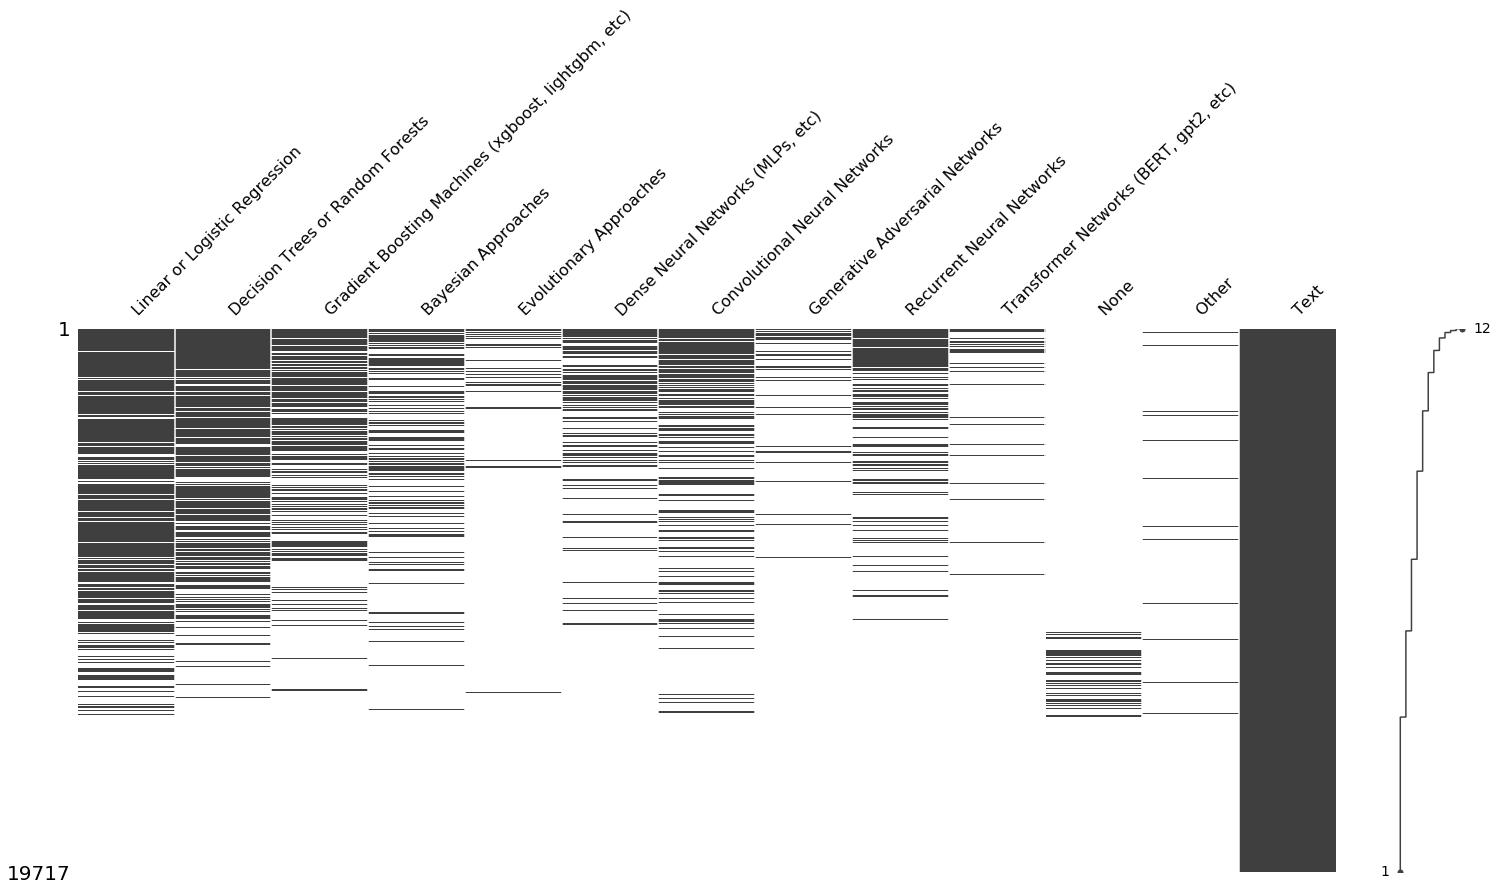

In [18]:
msno.matrix(q24_df, sort='descending')

Many people have checked as none. Perhaps the majority of those who were very annoyed by this questionnaire are. 


I would also like to see the correlation

In [19]:
# sns.heatmap(q24_df.corr())
q24_df.drop([' Text'], axis=1, inplace=True)
q24_df = q24_df.fillna(0).apply(lambda x : x!=0)

In [20]:
q24_df.drop([' None',' Other'], axis=1, inplace=True)

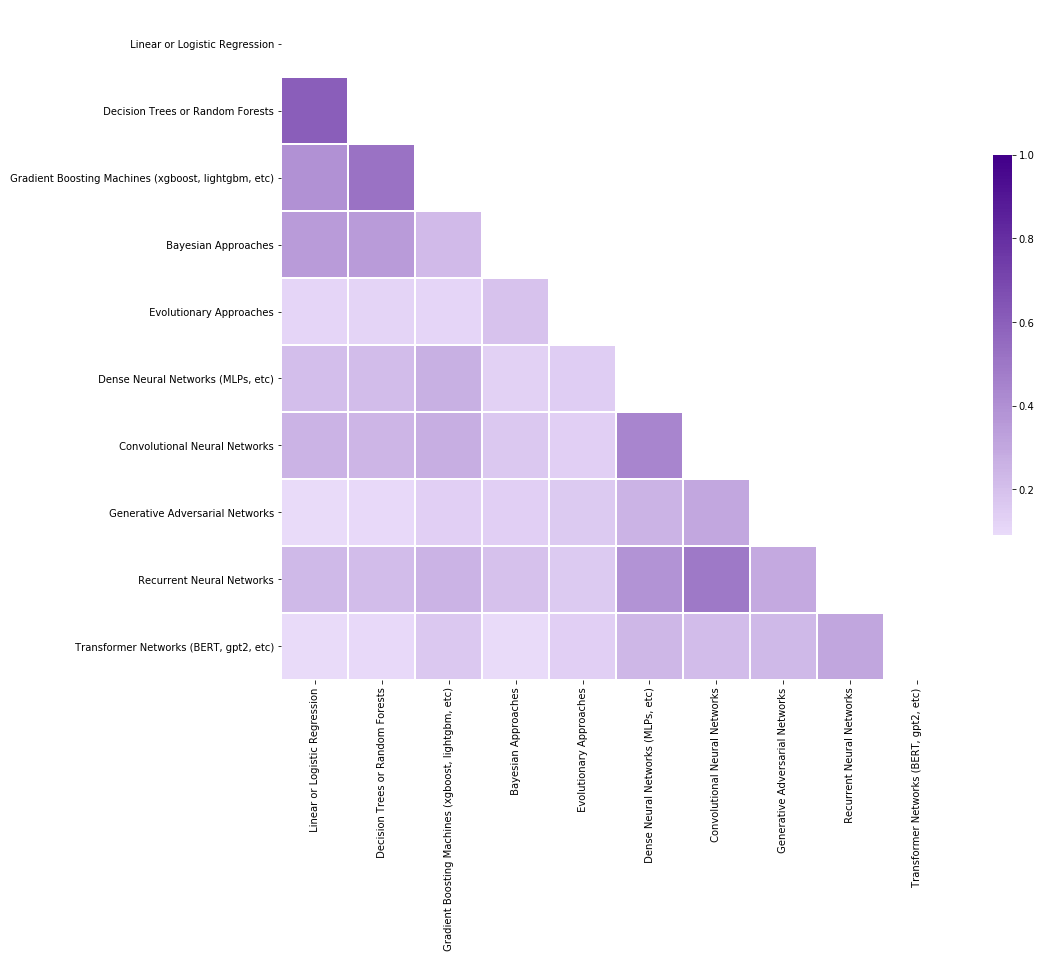

In [21]:
corr = q24_df.corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(150, 275, s=100, l=20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

It seems to be divided into structured data analysis / unstructured data analyst. (Because traditional machine learning methods are typically used for structured data, deep learning is used for unstructured data.)

This can be compared according to the main task.



## 3. How about ML Frameworks & Tools?

> Q25. Which categories of ML tools do you use on a regular basis? (Select all that apply) - Selected Choice

> Q28. Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice


Again, let's look at the detailed questions.

In [22]:
q25_df, q25_sub = q_list('Q25')

In [23]:
q25_convert = {b:a for a, b in zip(q25_sub.values, q25_df.columns)}
q25_df.rename(columns=q25_convert, inplace=True)

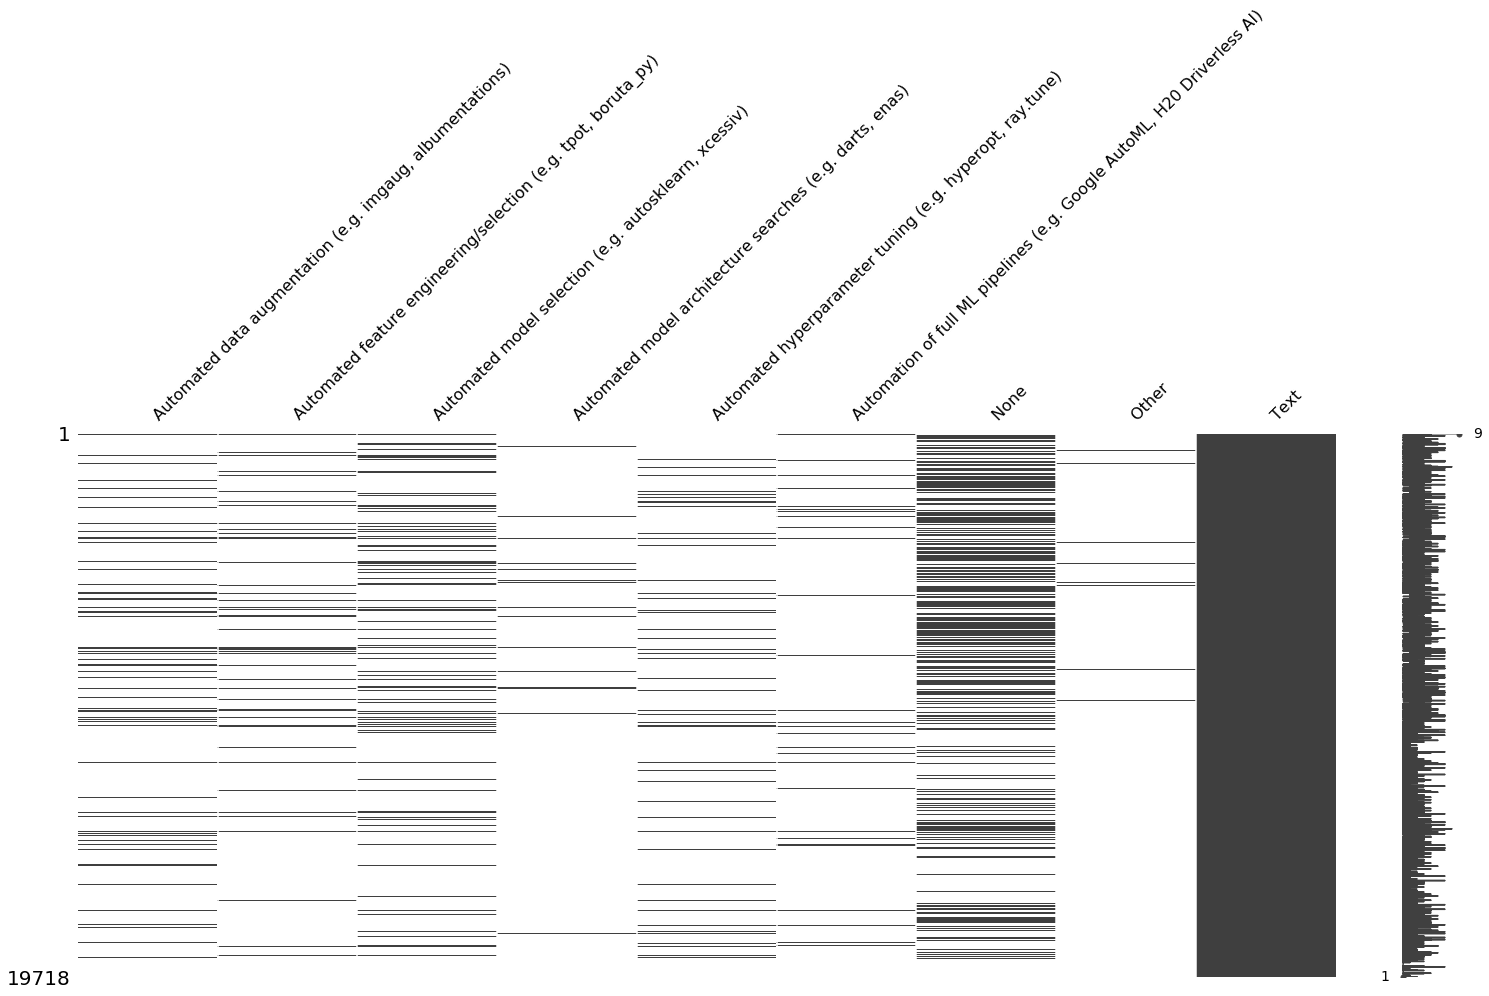

In [24]:
msno.matrix(q25_df)

Only questions about Auto ML-related tools seem to have fewer answers.

I have never used Auto ML Tool, but I want to learn it soon.

In [25]:
print('There are {} other text answers'.format(len(other_text['Q25_OTHER_TEXT'].dropna())))

There are 141 other text answers


Now let's look at what's hot with the framework.

First, let's check base framework.

In [26]:
q28_df, q28_sub = q_list('Q28')

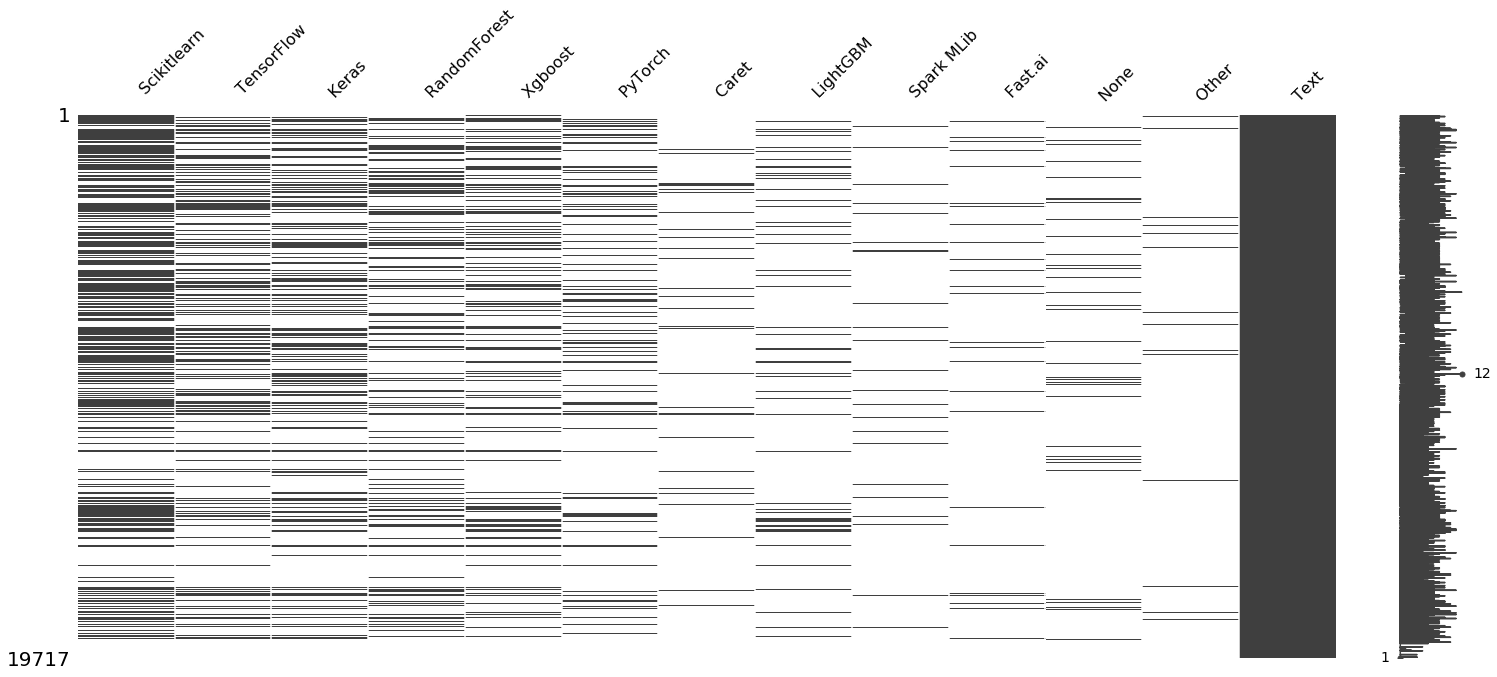

In [27]:
q28_df.drop(0, axis=0, inplace=True)
q28_convert = {b:a for a, b in zip(q28_sub.values, q28_df.columns)}
q28_df.rename(columns=q28_convert, inplace=True)
msno.matrix(q28_df)

In [28]:
import plotly.graph_objects as go

q28_ans = {}
for i in q28_df.columns[:-1]:
    q28_ans.update(q28_df[i].value_counts())

q28_cnt = pd.Series(q28_ans)

fig = go.Figure([go.Bar(x=q28_cnt.index, y=q28_cnt)])
fig.update_layout(title="ML basis Framworks Ranking")
fig.show()

In [29]:
y = q28_cnt

fig = go.Figure(go.Treemap(
    labels = y.index,
    parents = ['Framework'] * len(y),
    values = y
))

fig.update_layout(title = 'Treemap of Hot Frameworks')
fig.show()

Many people still like formal data analysis. 

> I think deep learning frameworks will be used more and more worldwide.

In [30]:
q28_df = q28_df.fillna(0).apply(lambda x : x!=0)
q28_df.drop([' None', ' Other', ' Text'], axis=1, inplace=True)

Let's look at the relationship between models and frameworks.

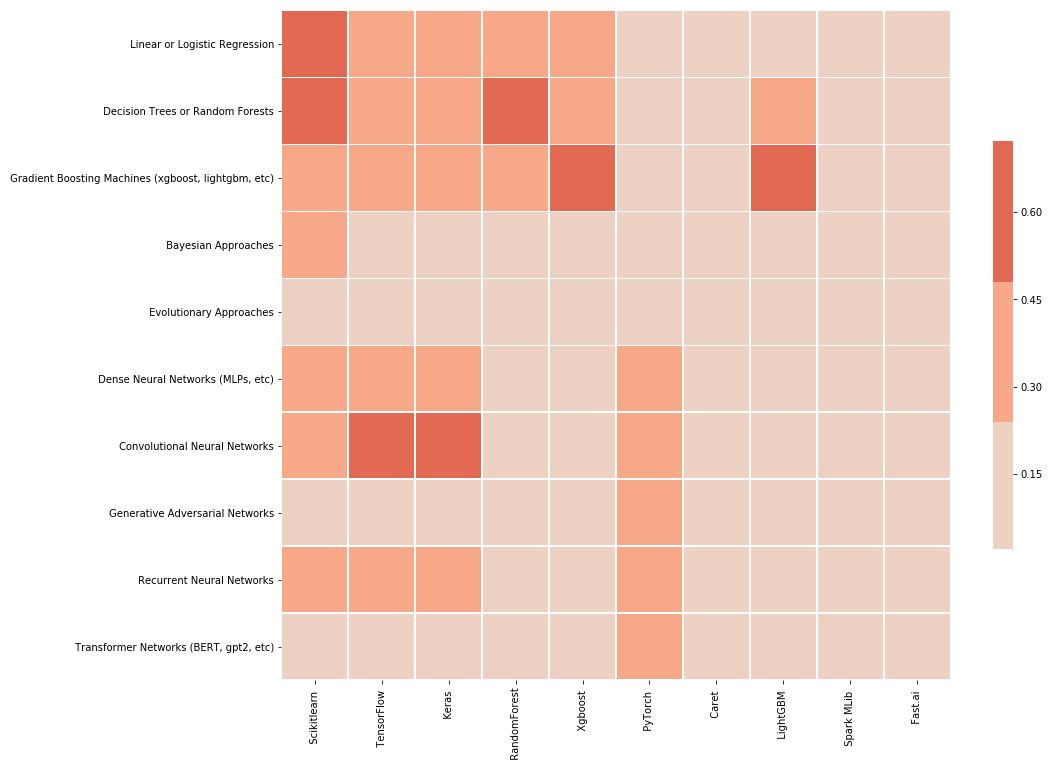

In [31]:
ML = pd.concat([q24_df, q28_df], axis=1)
fig, ax = plt.subplots(1,1, figsize=(15, 15))
sns.heatmap(ML.corr().iloc[0:10,10:], cmap=sns.color_palette("coolwarm"), center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

I can observe the following parts:

- **Scikit-Learn** : Linear/Logistic Regression, Decision Trees, Random Forest
- **Keras, Tensorflow** : CNN 
- **Pytorch** : More wide deep Learning task
- GBMs

If you're a newbie, this library is a good reference.

- [scikit-learn](https://scikit-learn.org/stable/)
- [Keras](https://keras.io/)
- [Tensorflow](https://www.tensorflow.org/)
- [PyTorch](https://pytorch.org/)
- [XGBoost](https://xgboost.readthedocs.io/en/latest/)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-API.html)

After all, it's important to know everything.

If you are a beginner, we recommend studying in the following order.

- Classic Machine Learning 
    - KNN, Linear/Logistic Regression, Decision Tree 
    - with Scikit-Learn
    - The application of ML is important, but the content of it is important. That's why it's important to learn intuition and mathematical concepts in the classic ML.
- Ensemble 
    - stacking, bagging, GBMs
    - XGBoost -> LightGBM -> CatBoost
    - LGBM seems to be the trend now.
- Deep learning 
    - Personally I recommend starting with Keras or Pytorch.



![](https://d3ansictanv2wj.cloudfront.net/image1-e18a246da831903928949a96696ffb38.png)

> Number of papers posted on arXiv.org that mention each framework. Source: Data from RISELab and graphic by Ben Lorica.

Pytorch is still less used than tensorflow and keras, but I'm wondering if the graph will reverse in the future.

## 4. How About Programming Language?

> Q18. What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice

> Q19. What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

Let's look at the recommendation language first and then the referrer's language.

In [32]:
q19_cnt = multiple_choice['Q19'].value_counts()[:-1]

fig = go.Figure([go.Bar(x=q19_cnt.index, y=q19_cnt, marker_color='crimson')])
fig.update_layout(title="Programming Language Ranking")
fig.show()

In [33]:
q18_df, q18_sub = q_list('Q18')

In [34]:
q18_df.drop(0, axis=0, inplace=True)

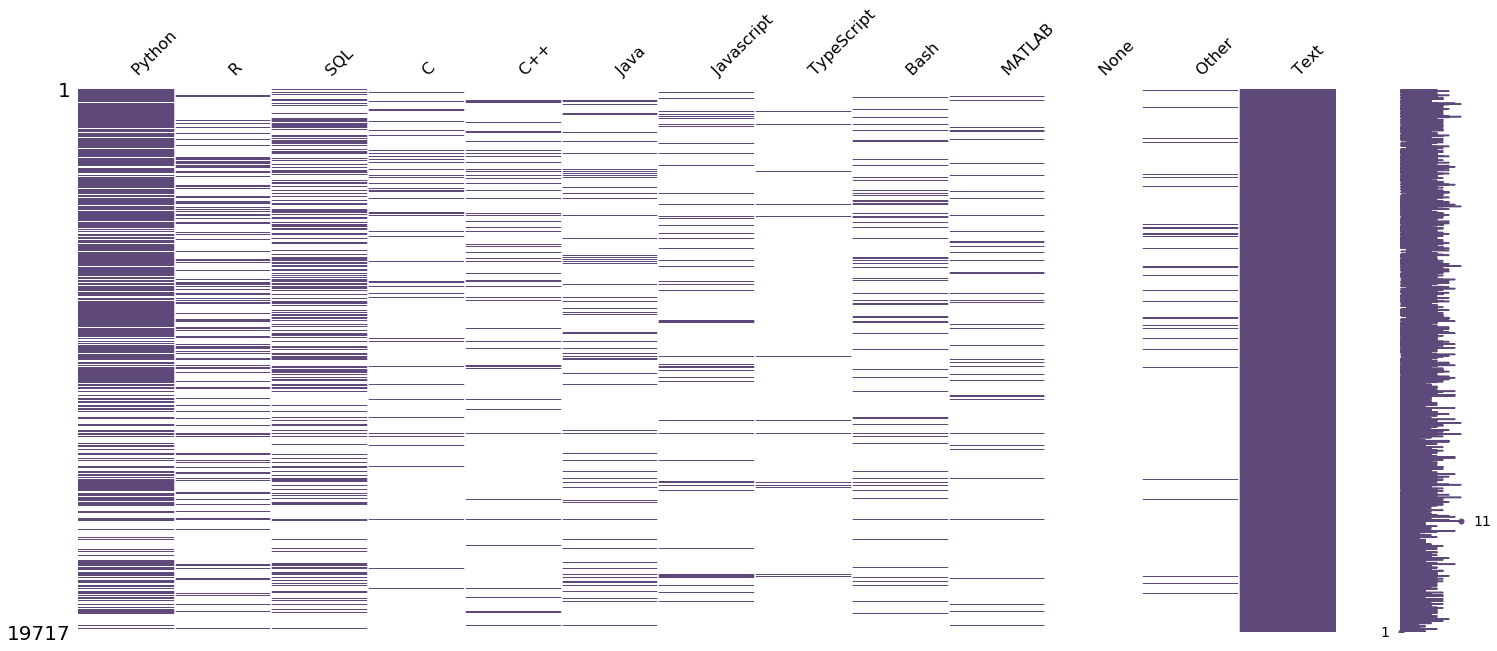

In [35]:
q18_convert = {b:a for a, b in zip(q18_sub.values, q18_df.columns)}
q18_df.rename(columns=q18_convert, inplace=True)
msno.matrix(q18_df, color=(0.37, 0.29, 0.48))

In [36]:
from IPython.display import Video

Video("https://thumbs.gfycat.com/UnderstatedAnotherAntelope-mobile.mp4")

> source : https://gfycat.com/understatedanotherantelope

Before looking at questions 5 and 6, the approximate ranking of languages worldwide has changed as follows.

We can see from JavaScript that the Web is now a key feature of the computer, and how Python's growth has increased its interest in AI.


## 5. What is the relationship between ML Career and Language recommendations?

> Q23. For how many years have you used machine learning methods?

So what about language recommendations based on their machine learning career?

In [37]:
data = multiple_choice[['Q19', 'Q23']]
data.drop(0, axis=0, inplace=True)

In [38]:
career = data['Q23'].value_counts()

fig = go.Figure([go.Bar(x=career.index, y=career, marker_color='#F6CD8B')])
fig.update_layout(title="Distribution of ML Career")
fig.show()

Personally, I think there are quite a few new developers just after AI has become hot. Will there be a lot of new developers in the next few years?

In [39]:
data.groupby('Q23')['Q19'].value_counts().unstack().fillna(0).T[[ '< 1 years', '1-2 years', '2-3 years', 
       '3-4 years', '4-5 years', '5-10 years', '10-15 years', '20+ years']].drop(['None','Other'], axis=0)

Q23,< 1 years,1-2 years,2-3 years,3-4 years,4-5 years,5-10 years,10-15 years,20+ years
Q19,,,,,,,,
Bash,11.0,7.0,5.0,2.0,2.0,5.0,0.0,2.0
C,72.0,40.0,11.0,7.0,5.0,4.0,7.0,2.0
C++,72.0,47.0,30.0,17.0,9.0,11.0,8.0,3.0
Java,41.0,15.0,15.0,7.0,6.0,7.0,2.0,6.0
Javascript,22.0,8.0,10.0,1.0,3.0,0.0,0.0,1.0
MATLAB,60.0,27.0,21.0,8.0,14.0,12.0,8.0,6.0
Python,4066.0,3104.0,1470.0,873.0,691.0,639.0,217.0,109.0
R,433.0,308.0,161.0,105.0,119.0,115.0,54.0,34.0
SQL,305.0,202.0,103.0,54.0,54.0,54.0,26.0,10.0


In [40]:
fig = px.histogram(data.dropna(), x='Q23', y='Q23', color='Q19', template='ggplot2')
fig.update_layout()
fig.show()

I can see that Python has the most and follows a similar pattern depending on the person's career.

I started Algorithm Problem Solving in C ++, now I'm working on several DS / AI fields with Python, and web development with JS.

I also recommend Python for the first starter. There are no languages as good as Python in terms of versatility and difficulty.

## 6. What is the relationship between Programming Career and Language recommendations?

> Q15. How long have you been writing code to analyze data (at work or at school)?

In fact, the person doing the analysis here expects to have almost the same distribution because there are many ML workers, but let's do it once.

In [41]:
data = multiple_choice[['Q19', 'Q15']]
data.drop(0, axis=0, inplace=True)

career = data['Q15'].value_counts()[[ 'I have never written code', '< 1 years', '1-2 years',
       '3-5 years', '5-10 years', '10-20 years', '20+ years' ]]

fig = go.Figure([go.Bar(x=career.index, y=career, marker_color='#A8204E')])
fig.update_layout(title="Distribution of Programming Career")
fig.show()

display(data.groupby('Q15')['Q19'].value_counts().unstack().fillna(0).T[
    [ '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']]
        .drop(['None','Other'], axis=0))

fig = px.histogram(data.dropna(), x='Q15', y='Q15', color='Q19', template='ggplot2')
fig.update_layout()
fig.show()

Q15,< 1 years,1-2 years,3-5 years,5-10 years,10-20 years,20+ years
Q19,,,,,,
Bash,6.0,9.0,8.0,7.0,3.0,2.0
C,48.0,49.0,25.0,14.0,8.0,9.0
C++,43.0,71.0,36.0,19.0,18.0,12.0
Java,34.0,24.0,21.0,14.0,4.0,7.0
Javascript,16.0,9.0,11.0,5.0,5.0,1.0
MATLAB,49.0,36.0,26.0,20.0,18.0,13.0
Python,3054.0,3199.0,2591.0,1377.0,734.0,361.0
R,250.0,320.0,340.0,218.0,129.0,86.0
SQL,138.0,200.0,202.0,152.0,81.0,44.0


## 7. Personal thoughts about the visualization library

> Q20. What data visualization libraries or tools do you use on a regular basis? (Select all that apply) - Selected Choice

I like visualization the most in data analysis.

So I have made the following kernel : 

- [Road to Viz Expert (1) - Unusual tools](https://www.kaggle.com/subinium/road-to-viz-expert-1-unusual-tools)
- [Road to Viz Expert (2) - Plotly & Seaborn](https://www.kaggle.com/subinium/road-to-viz-expert-2-plotly-seaborn)
- [Road to Viz Expert (3) - Geo with Plotly Express](https://www.kaggle.com/subinium/road-to-viz-expert-3-geo-with-plotly-express)
- [Road to Viz Expert (4) - Unusual Tools II](https://www.kaggle.com/subinium/road-to-viz-expert-4-unusual-tools-ii)

- [3D Interactive Car🚗 with Plotly](https://www.kaggle.com/subinium/3d-interactive-car-with-plotly)
- [Weather Dashboard : EDA & Visualization ⛅🌡️](https://www.kaggle.com/subinium/weather-dashboard-eda-visualization)
- [Mask visualization, managing with buttons!](https://www.kaggle.com/subinium/mask-visualization-managing-with-buttons)

The various visualizations of this kernel can be found in my various kernels.

Let's see survey again.

In [42]:
q20_df, q20_sub = q_list('Q20')
q20_df.drop(0, axis=0, inplace=True)

In [43]:
q20_ans = {}
for i in q20_df.columns[:-1]:
    q20_ans.update(q20_df[i].value_counts())

q20_cnt = pd.Series(q20_ans)

fig = go.Figure([go.Bar(x=q20_cnt.index, y=q20_cnt, marker_color='teal')])
fig.update_layout(title="Viz Library")
fig.show()

- [My experience and thoughts on python visualization tools](https://www.kaggle.com/general/111519)

After studying kaggle and ML, I wrote about my experiences and thoughts about visualization tools. Many thanks for making a good kernel that helped me to study a lot.

> Experts are good at visualizing any library.

- **[matplotlib](https://matplotlib.org/)** : basic to Python visualization, but apart from light plotting. Of course a lot of customization is possible, but I think it's a good idea to do it from the beginning. However, they are often used together with other packages, so knowing their overall structure makes them more useful. (The elements and positions of titles, axes, ax, etc., as if you are good at css and js, can feel free to use other packages.) + For pandas visualizations, import into matplotlib.


- **[seaborn](https://seaborn.pydata.org/index.html)** : It is a visualization tool based on matplotlib, which makes it much easier and allows various plots. It's probably the most used tool for kaggle right now. There are a lot of parts that work with matplotlib, so it's best to use them together. (a variety of attractions including lmplot, boxplot, barplot, countplot, violinplot, pariplot, FacetGrid, etc.)

- **[plotly.express](https://plot.ly/python/plotly-express/)** : I think it's a library between plotly and seaborn, and I personally think it's the best visualization library. The downside is that the official documentation is still unorganized, but I still think it's the best visualization tool.

- **[plotly](https://plot.ly/python/), [bokeh](http://docs.bokeh.org/en/0.13.0/)** : For those who are new to it, this tool will show you a new world of visualization. Enable interactive visualization. Of course, there is a lot of computation, which slows down the browser. Personally, bubble charts and bar charts are useful. Three-dimensional mapping is also attractive across domains. It seems that plotly is used more frequently than bokeh. Probably because of a browser problem.


- **[altair](https://www.altair.com/)** : Unlike plotly and bokeh, an interactive library specialized for heatmaps and barplot. It's relatively fast, the default design is pretty, and it's a specialized visualization. However, it is not recommended to use complicated setting.

- **[plotnine](https://plotnine.readthedocs.io/en/stable/)** (ggplot): This tool allows you to use ggplot in Python, which is familiar to R users. Few people use R and Python at the same time, so it doesn't seem to be used much.

- **basemap, pygmap, geopandas, and folium** : A variety of python tools for displaying maps. All three are a bit uncomfortable for me. The advantage is that you can still plot the map.

Now it's a bit minor, but if you briefly mention the packages you found while exploring kaggle:

- **[squarify](https://github.com/laserson/squarify)** : A tool for drawing treemaps in python. It's based on matplotlib and personally my favorite plot.

- **[wordcloud](https://github.com/amueller/word_cloud)** : It is a famous visualization method in text data, and it is a tool for mapping text according to frequency.  You can proceed the wordcloud to a specific vector image frame, which makes it an attractive tool.

- **[missingno](https://github.com/ResidentMario/missingno)** : Tool to visualize empty data in the data. It is good to be able to see pattern and sparseness of null data.

- **[NetworkX](https://networkx.github.io/)** : A good tool for plotting graphs. There are many uses in certain areas such as GNN.

- **[pywaffle](https://github.com/gyli/PyWaffle), venn** : A tool to draw unusual charts and band diagrams called waffle charts. Although not used much, there is no replaceable plotting, which makes it very useful.

Visualizations often help model interpretation, such as:

- **[dtreeviz](https://github.com/parrt/dtreeviz)** : One of the more efficient visualization tools for decision trees. I have posted this before, and it helps me to interpret it by graphing the classifiers and their status.


- **[SHAP](https://github.com/slundberg/shap), [LIME](https://github.com/marcotcr/lime)** : Two of the most famous methods and visualizations for interpretable AI. Both aim to visualize the interpretation of the model. 

## 8. What kind of DB do you use?

> Q34. Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice

In the case of Kaggle Newbie, studying machine learning only with competition can be a real problem, and often doesn't know how to connect it to a database or server.

For me, for this reason, I have been very interested in MLOps lately.

In [44]:
q34_df, q34_sub = q_list('Q34')
q34_df.drop(0,axis=0,inplace=True)

In [45]:
q34_ans = {}
for i in q34_df.columns[:-1]:
    q34_ans.update(q34_df[i].value_counts())

q34_cnt = pd.Series(q34_ans)
fig = go.Figure([go.Bar(x=q34_cnt.index, y=q34_cnt, marker_color='darkseagreen')])
fig.update_layout(title="Database")
fig.show()

DB seems to be different according to the taste of the person. MySQL is used as much as it is the most common, but it doesn't make much difference.

I was curious, but I do not have enough personal DB knowledge to analyze it.

## 9. How about Kaggler's development environment like? 

> Q16. Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply) - Selected Choice

> Q17. Which of the following hosted notebook products do you use on a regular basis? (Select all that apply) - Selected Choice

Similar to step 8, the development environment is important. Let's see what kind of environment they are writing code in.

In [46]:
q16_df, q16_sub = q_list('Q16')
q16_df.drop(0, axis=0, inplace=True)

In [47]:
q16_ans = {}
for i in q16_df.columns[:-1]:
    q16_ans.update(q16_df[i].value_counts())

q16_cnt = pd.Series(q16_ans)

fig = go.Figure([go.Bar(x=q16_cnt.index, y=q16_cnt, marker_color='mediumturquoise')])
fig.update_layout(title="IDE")
fig.show()

Here is the link to the editor.

- [Jupyter](https://jupyter.org/) : Project Jupyter exists to develop open-source software, open-standards, and services for interactive computing across dozens of programming languages.
- [RStudio](https://rstudio.com/) : Open source and enterprise-ready professional software for data science.
- [PyCharm](https://www.jetbrains.com/pycharm/) : The Python IDE for Professional Developers
- [Atom](https://atom.io/) : A hackable text editor for the 21st Century
- [MATLAB](https://www.mathworks.com/products/matlab.html) : Math. Graphics. Programming.
- [Visual Studio / Visual Studio Code](https://code.visualstudio.com/) : Code editing. Redefined. Free. Built on open source. Runs everywhere.
- [Spyder](https://www.spyder-ide.org/) : Spyder is a powerful scientific environment written in Python, for Python, and designed by and for scientists, engineers and data analysts.
- Vim / Emacs
- [Notepad++](https://notepad-plus-plus.org/) : Notepad++ is a free source code editor and Notepad replacement that supports several languages. 
- [Sublime Text](https://www.sublimetext.com/) : A sophisticated text editor for code, markup and prose

I have used jupyter, pycharm, atom, vs / vscode, vim, notepad++, sublime text.
Currently I am using jupyter and vs code.

In the DS world where you need to keep testing, ipython environments like jupyter are a good fit. And it's very easy to have another server. And other than that, it's lightweight and the library uses a lot of vs code.

In [48]:
q17_df, q17_sub = q_list('Q17')
q17_df.drop(0, axis=0, inplace=True)

q17_ans = {}
for i in q17_df.columns[:-1]:
    q17_ans.update(q17_df[i].value_counts())

q17_cnt = pd.Series(q17_ans)

fig = go.Figure([go.Bar(x=q17_cnt.index, y=q17_cnt, marker_color='tomato')])
fig.update_layout(title="Notebook Products")
fig.show()

Recently, the Colab GPU was upgraded to P100. Personally, I prefer the Kaggel notebook because of CSS. If you have a good UI / UX environment, please recommend.

## 10. What kind of jobs do Kagglers have? What is their educational background? 

> Q4. What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

> Q5. Select the title most similar to your current role (or most recent title if retired): - Selected Choice

It is certain that Kaggle is a platform that should spend quite some time.
So depending on what kind of job you have, the access point for this site can be different.

In [49]:
q5 = multiple_choice[['Q5']]
q5.drop(0, axis=0, inplace=True)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



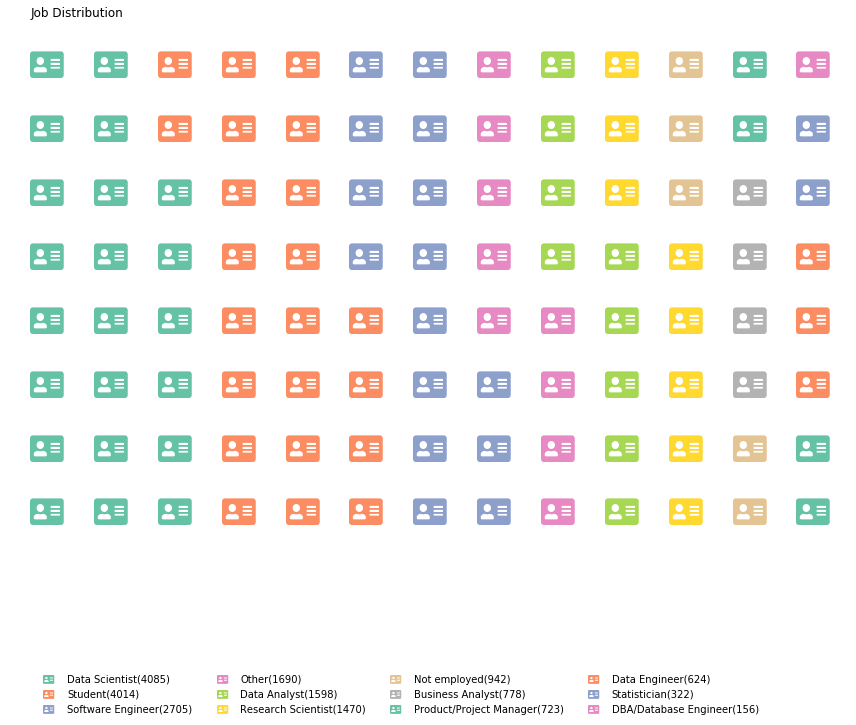

In [50]:
from pywaffle import Waffle

jobs = q5['Q5'].value_counts()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=8,
    columns=13,
    values=jobs,
    title={'label': 'Job Distribution', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(jobs.index, jobs) ],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(jobs)//3,  'framealpha': 0},
    font_size=30, 
    icons = 'address-card',
    figsize=(12, 12),  
    icon_legend=True
)

There are certainly many data professionals. The interesting thing is that there are quite a few students.

In [51]:
jobs_educational = multiple_choice[['Q4', 'Q5']]
jobs_educational.drop(0, axis=0, inplace=True)

In [52]:
tmp = jobs_educational.groupby('Q5')['Q4'].value_counts()
tmp2 = jobs_educational.groupby('Q5').count()

labels = []
parents = []
values = []

values.append(len(jobs_educational))
parents.append("")
labels.append("Tot")

for a, b in zip(tmp2.values, tmp2.index):
    values.append(a[0])
    parents.append("Tot")
    labels.append(b)

    

for a, b in zip(tmp.values, tmp.index):
    values.append(a)
    parents.append(b[0])
    labels.append(b[1])
    
fig =go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
))

fig.update_layout(title="Jobs & Education",
                  margin = dict(t=0, l=0, r=0, b=0))

fig.show()

### 10-1. Jobs & Language

What is the language distribution by occupation?

In [53]:
q18_df, q18_sub = q_list('Q18')
q18_df.drop(0, axis=0, inplace=True)
q18_convert = {b:a for a, b in zip(q18_sub.values, q18_df.columns)}
q18_df.rename(columns=q18_convert, inplace=True)

In [54]:
jobs_lang = multiple_choice[['Q5']]
jobs_lang.drop(0, axis=0, inplace=True)

jobs_lang = pd.concat([jobs_lang, q18_df], axis=1).fillna('')

job_lang_table = pd.DataFrame(index = jobs_lang['Q5'].unique())

labels = list(jobs_lang['Q5'].unique())
parents = [''] * len(jobs_lang['Q5'].unique())
values = [jobs_lang['Q5'].value_counts()[i] for i in jobs_lang['Q5'].unique()]

for i in q18_sub[:-2]:
    tmp = jobs_lang.groupby('Q5')[i].value_counts()
    for val, idx in zip(tmp, tmp.index):
        if idx[0] == '' or idx[1] == '': continue 

        labels.append(idx[1])
        parents.append(idx[0])
        values.append(val)

fig = go.Figure(go.Treemap(
    labels = labels,
    parents = parents,
    values = values,
))

fig.show()

You can find some interesting facts by checking the treemap.

For most occupations, Python ranks first and SQL second.

However, only statisticians rank R first.

Of course, people could choose multiple languages ​​for one job, but it is surprising that this trend is emerging.


### 10-2. Jobs & Framework

In [55]:
q28_df, q28_sub = q_list('Q28')
q28_df.drop(0, axis=0, inplace=True)
q28_convert = {b:a for a, b in zip(q28_sub.values, q28_df.columns)}
q28_df.rename(columns=q28_convert, inplace=True)

jobs_lang = multiple_choice[['Q5']]
jobs_lang.drop(0, axis=0, inplace=True)

jobs_lang = pd.concat([jobs_lang, q28_df], axis=1).fillna('')

job_lang_table = pd.DataFrame(index = jobs_lang['Q5'].unique())

labels = list(jobs_lang['Q5'].unique())
parents = [''] * len(jobs_lang['Q5'].unique())
values = [jobs_lang['Q5'].value_counts()[i] for i in jobs_lang['Q5'].unique()]

for i in q28_sub[:-2]:
    tmp = jobs_lang.groupby('Q5')[i].value_counts()
    for val, idx in zip(tmp, tmp.index):
        if idx[0] == '' or idx[1] == '': continue 

        labels.append(idx[1])
        parents.append(idx[0])
        values.append(val)

fig = go.Figure(go.Treemap(
    labels = labels,
    parents = parents,
    values = values,
))

fig.show()

## 11. Is salary high depending on career? How about educational background? 

> Q4. What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

> Q10. What is your current yearly compensation?

> Q15. How long have you been writing code to analyze data (at work or at school)?

In fact, money questions are always fun.

![money](https://media.giphy.com/media/xTiTnqUxyWbsAXq7Ju/giphy.gif)
> img from https://giphy.com/gifs/yosub-money-donald-duck-cash-xTiTnqUxyWbsAXq7Ju


Let's look at the annual salary.


Most graphs will be viewed in the following order:

- Distribution over the whole figure,
- Percentage in percent
- Average value

As a statistician, you shouldn't have complete confidence in the mean, but the visualization below shows the trend.

In [56]:
salary_career = multiple_choice[['Q4', 'Q10', 'Q15']].drop(0, axis=0)

First let's look at the salary distribution.

In [57]:
salary_order = ['$0-999', 
'1,000-1,999',
'2,000-2,999',
'3,000-3,999',
'4,000-4,999',
'5,000-7,499',
'7,500-9,999',
'10,000-14,999', 
'15,000-19,999',
'20,000-24,999',
'25,000-29,999',
'30,000-39,999',
'40,000-49,999', 
'50,000-59,999',
'60,000-69,999',
'70,000-79,999',
'80,000-89,999',
'90,000-99,999',
'100,000-124,999', 
'125,000-149,999', 
'150,000-199,999', 
'200,000-249,999',
'250,000-299,999',
'300,000-500,000',
'> $500,000',]

salary_dist = salary_career['Q10'].value_counts()[salary_order]

fig = go.Figure([go.Bar(x=salary_dist.index, y=salary_dist, marker_color='#5f4b8b')])

fig.update_layout(title="Salary Distribtuion ($USD)")
fig.show()


### 11-1. Educational background & Average Salary

The distribution is more diverse than I thought. I expected a normal distribution, but that's a shame.

Now let's see what distribution this has for each condition.

Let's look at a typical counting distribution and scaled distribution based on that condition.

In [58]:
degree_order = ['No formal education past high school',
'Some college/university study without earning a bachelor’s degree',
'Bachelor’s degree',
'Master’s degree',
'Doctoral degree',
'Professional degree']

salary_degree = salary_career.groupby('Q4')['Q10'].value_counts().unstack().fillna(0)[salary_order]

In [59]:
fig = go.Figure()

for i in degree_order:
    fig.add_trace(go.Line(x=salary_order, y=salary_degree.loc[i], name=i ))

fig.update_layout(title="Salary Distribtuion by Educational ($USD)")
fig.show()

/opt/conda/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [60]:
fig = go.Figure()

for i in degree_order:
    fig.add_trace(go.Line(x=salary_order, y=salary_degree.loc[i] / sum(salary_degree.loc[i] ), name=i ))

fig.update_layout(title="Salary Distribtuion by Educational / Ratio ($USD)")
fig.show()

Comparing the two line graphs clearly shows that the distribution of doctoral programs is skewed to the right.

In [61]:
salary_est = [500, 1500, 2500, 3500, 4500, 6250, 8750, 12500, 17500, 22500, 27500, 35000, 45000, 55000, 65000, 75000, 85000, 95000, 112500, 137500, 175000, 225000, 275000, 400000, 500000]

tmp_dict = dict()
for a, b in zip(salary_order, salary_est):
    tmp_dict.update({a:b})
    
display(pd.DataFrame(pd.Series(tmp_dict)).T)

,$0-999,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999",...,"70,000-79,999","80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-500,000","> $500,000"
0,500,1500,2500,3500,4500,6250,8750,12500,17500,22500,...,75000,85000,95000,112500,137500,175000,225000,275000,400000,500000


The average amount is estimated as follows. (If the distribution within the interval is normally distributed, we thought we would use the median.)

In [62]:
lst = []
tot, length = 0, 0
for i in degree_order:
    lst.append(sum(salary_degree.loc[i].values * salary_est )/ sum(salary_degree.loc[i]))
    tot += sum(salary_degree.loc[i].values * salary_est )
    length += sum(salary_degree.loc[i])

mean_salary = tot/length
    
fig = go.Figure([go.Bar(x=degree_order, y=lst, marker_color='#20639B')])
fig.add_trace(go.Bar(x=['Average'], y=[mean_salary], marker_color='crimson'))
fig.update_layout(title="Educational Degree & Average Salary", showlegend=False)
fig.show()

Those who earned a Ph.D. in the second half of the graph show that the salary is somewhat high. 

Even if you look at the average, degree holders can see some linearity.

This is why We have to go to a Ph.D.

> I think that no formal education past high school is actually a successful dropout like Steve Jobs or Bill Gates. In fact, the answer may really be outside of school. Of course it would be different if it was a Ph.D.

### 11-2. Career & Averagy Salary

In [63]:
salary_degree2 = salary_career.groupby('Q15')['Q10'].value_counts().unstack().fillna(0)[salary_order]


In [64]:
career_order = [ 'I have never written code', '< 1 years', '1-2 years',
       '3-5 years', '5-10 years', '10-20 years', '20+ years' ]

fig = go.Figure()

for i in career_order:
    fig.add_trace(go.Line(x=salary_order, y=salary_degree2.loc[i], name=i ))

fig.update_layout(title="Salary Distribtuion by Career ($USD)")
fig.show()

In [65]:
career_order = [ 'I have never written code', '< 1 years', '1-2 years',
       '3-5 years', '5-10 years', '10-20 years', '20+ years' ]

fig = go.Figure()

for i in career_order:
    fig.add_trace(go.Line(x=salary_order, y=salary_degree2.loc[i] / sum(salary_degree2.loc[i] ), name=i ))

fig.update_layout(title="Salary Distribtuion by Career / Ratio ($USD)")
fig.show()

In [66]:
lst = []
for i in career_order:
    lst.append(sum(salary_degree2.loc[i].values * salary_est )/ sum(salary_degree2.loc[i]))
    

fig = go.Figure([go.Bar(x=career_order, y=lst, marker_color='#F3872F')])
fig.add_trace(go.Bar(x=['Average'], y=[mean_salary], marker_color='crimson'))
fig.update_layout(title="Career & Average Salary", showlegend=False)
fig.show()

It's clearer here, but those who have been coding for a long time are surely high.

You can see that we need to keep developing. we have to take 3-5 years to get an average

## 12. How about Gender, Age, Country & Salary?

As an extension to question 1, let's look at the salary by gender and age, country.

### 12-1. Age & Salary

I think Age & Salary is 'almost' numerical data, so I can draw scatter(bubble plot)

In [67]:
salary_info = multiple_choice[['Q1', 'Q2', 'Q3', 'Q10']].drop(0, axis=0)

In [68]:
salary_info['age'] = salary_info['Q1'].apply(lambda x : int(x[:2]))
# salary_info['salary'] = salary_info['Q10'].map({a:b for a, b in zip(salary_degree3.columns,salary_est)})
salary_degree3 = salary_info.groupby('age')['Q10'].value_counts().unstack().fillna(0)

salary_degree3.rename(columns = {a:b for a, b in zip(salary_degree3.columns,salary_est)}, inplace=True)

fig = go.Figure()


for i in salary_degree3.index:
    x = []
    y = []
    sz = []

    for j, k in zip(salary_degree3.loc[i], salary_degree3.columns):
        sz.append(j/2.7)
        y.append(k)
        x.append(i)
    fig.add_trace(go.Scatter(
        x=x, y=y,
        mode='markers',
        marker_size=sz,
        name=i)
    )
    
fig.update_layout(title="Salary & Age (Scale)",
                  width=1200,
                  height=700,)

fig.show()

In [69]:
salary_degree3 = salary_info.groupby('Q1')['Q10'].value_counts().unstack().fillna(0)
fig = go.Figure()

for i in salary_info['Q1'].value_counts().sort_index().index:
    fig.add_trace(go.Line(x=salary_order, y=salary_degree3.loc[i] / sum(salary_degree3.loc[i]), name=i ))

fig.update_layout(title="Salary Distribtuion by Age / Ratio ($USD)")
fig.show()

In [70]:
lst = []
for i in salary_info['Q1'].value_counts().sort_index().index:
    lst.append(sum(salary_degree3.loc[i].values * salary_est )/ sum(salary_degree3.loc[i]))
    

fig = go.Figure([go.Bar(x=salary_info['Q1'].value_counts().sort_index().index, y=lst, marker_color='#FF598F')])
fig.add_trace(go.Bar(x=['Average'], y=[mean_salary], marker_color='green'))
fig.update_layout(title="Age & Average Salary", showlegend=False)
fig.show()

You can see that it is also linear here.

All their experiences are rewarded. I should code hard too.

It's above average in 30s.

### 12-2. Gender & Salary

In [71]:
salary_degree4 = salary_info.groupby('Q2')['Q10'].value_counts().unstack().fillna(0)[salary_order]

fig = go.Figure()

for i in salary_info['Q2'].value_counts().index:
    fig.add_trace(go.Line(x=salary_order, y=salary_degree4.loc[i], name=i ))

fig.update_layout(title="Salary Distribtuion by Gender ($USD)")
fig.show()

In [72]:
fig = go.Figure()

for i in salary_info['Q2'].value_counts().index:
    fig.add_trace(go.Line(x=salary_order, y=salary_degree4.loc[i] / sum(salary_degree4.loc[i]) , name=i ))

fig.update_layout(title="Salary Distribtuion by Gender / Ratio ($USD)")
fig.show()

In [73]:
lst = []
for i in salary_info['Q2'].value_counts().index:
    lst.append(sum(salary_degree4.loc[i].values * salary_est )/ sum(salary_degree4.loc[i]))
    

fig = go.Figure([go.Bar(x=salary_info['Q2'].value_counts().index, y=lst, marker_color='#6A67CE')])
fig.add_trace(go.Bar(x=['Average'], y=[mean_salary], marker_color='crimson'))
fig.update_layout(title="Gender & Average Salary", showlegend=False)
fig.show()

Here you can see that there is about 25% difference between male/female.

Before looking at the country differences below, let's take a look at the percentage differences between male and female.

- Formula : Female Wages-Male Wages / Male Wages

And I was surprised to do this work. In this survey, My home country, Korea, was divided into South Korea and Republic of Korea. Korea also has wage gaps, but not as bad as the statistics show. Please see South Korea.

In [74]:
salary_info['money'] = salary_info['Q10'].map(tmp_dict)
# salary_info['money'] = salary_info['money'].fillna(mean_salary)

salary_info2 = salary_info[:]
salary_info2 = salary_info2.dropna()

salary_gender_country = salary_info2.groupby(['Q3', 'Q2'])['money'].mean().unstack().fillna(0)
salary_gender_country['Female/Male'] = ( salary_gender_country['Female'] - salary_gender_country['Male'])/salary_gender_country['Male']  
display(salary_gender_country)

salary_gender_country['Country'] = salary_gender_country.index
fig = px.choropleth(salary_gender_country, locations='Country',
                    locationmode='country names',
                    color="Female/Male",
                    color_continuous_scale=[[0.0, "rgb(165,0,38)"],
                                            [0.1111111111111111, "rgb(215,48,39)"],
                                            [0.2222222222222222, "rgb(244,109,67)"],
                                            [0.3333333333333333, "rgb(253,174,97)"],
                                            [0.4444444444444444, "rgb(254,224,144)"],
                                            [0.5555555555555556, "rgb(224,243,248)"],
                                            [0.6666666666666666, "rgb(171,217,233)"],
                                            [0.7777777777777778, "rgb(116,173,209)"],
                                            [0.8888888888888888, "rgb(69,117,180)"],
                                            [1.0, "rgb(49,54,149)"]],
                     range_color=[-1,1]
                   )
                    
fig.update_layout(title="Gender wage inequality (difference percentage)")
fig.show()


Q2,Female,Male,Prefer not to say,Prefer to self-describe,Female/Male
Q3,,,,,
Algeria,2785.714286,6060.344828,0.000000,0.000000,-0.540337
Argentina,14812.500000,18520.833333,10625.000000,0.000000,-0.200225
Australia,64693.548387,113476.878613,195625.000000,0.000000,-0.429897
Austria,52500.000000,60729.729730,1500.000000,0.000000,-0.135514
Bangladesh,6250.000000,14640.350877,13500.000000,0.000000,-0.573098
Belarus,10781.250000,22315.789474,0.000000,0.000000,-0.516878
Belgium,32000.000000,71158.163265,55000.000000,0.000000,-0.550298
Brazil,21074.074074,31342.050209,57500.000000,500.000000,-0.327610
Canada,60539.285714,79311.659193,46416.666667,93750.000000,-0.236691


### 12-3. Country & Salary

In [75]:
salary_degree5 = salary_info.groupby('Q3')['Q10'].value_counts().unstack().fillna(0)[salary_order]

lst = []
idx = list(salary_info['Q3'].value_counts().index)
for i in idx:
    lst.append(sum(salary_degree5.loc[i].values * salary_est )/ sum(salary_degree5.loc[i]))

idx.append('AVG')
lst.append(mean_salary)
    
colors = ['lightslategray',] * len(lst)
colors[41] = 'crimson'
    
fig = go.Figure([go.Bar(y=[x for _,x in sorted(zip(lst, idx))], x=sorted(lst), 
                        marker_color=colors,
                        orientation='h'
                       )])

fig.update_layout(title="Country & Average Salary", 
                  width=600,
                  height=1200,
                  showlegend=False)
fig.show()

In [76]:
lst = []
idx = list(salary_info['Q3'].value_counts().index)
for i in idx:
    lst.append(sum(salary_degree5.loc[i].values * salary_est )/ sum(salary_degree5.loc[i]))

country_salary = pd.DataFrame.from_dict( {'Country':idx, 'Salary':lst})

fig = px.choropleth(country_salary, locations='Country',
                    locationmode='country names',
                    color="Salary",
                    color_continuous_scale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]])
fig.update_layout(title="Average Salary Map")
fig.show()

Looks where to work in the future to make money :)

## 13. Where is the Best Source to study machine learning? 

> Q12. Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice

> Q13. Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice

Let's see what people are up to.

In [77]:
q12_df, q12_sub = q_list('Q12')
q12_df.drop(0, axis=0, inplace=True)

In [78]:
q12_ans = {}
for i in q12_df.columns[:-1]:
    q12_ans.update(q12_df[i].value_counts())

q12_cnt = pd.Series(q12_ans)

fig = go.Figure([go.Bar(x=q12_cnt.index, y=q12_cnt, marker_color='skyblue')])
fig.update_layout(title="Favorite Source to Study ML")
fig.show()

In [79]:
q13_df, q13_sub = q_list('Q13')
q13_df.drop(0, axis=0, inplace=True)

In [80]:
q13_ans = {}
for i in q13_df.columns[:-1]:
    q13_ans.update(q13_df[i].value_counts())

q13_cnt = pd.Series(q13_ans)

fig = go.Figure([go.Bar(x=q13_cnt.index, y=q13_cnt, marker_color='salmon')])
fig.update_layout(title="Best Place to Study ML")
fig.show()

Here's a link to each site.

- [Udacity](https://www.udacity.com/)
- [Coursera](https://www.coursera.org/)
- [edX](https://www.edx.org/)
- [DataCamp](https://www.datacamp.com/)
- [DataQuest](https://www.dataquest.io/)
- [Kaggle Courses](https://www.kaggle.com/learn/overview)
- [Fast.ai](https://www.fast.ai/)
- [Udemy](https://www.udemy.com/)
- [LinkedIn Learning](https://www.linkedin.com/learning/)

Personally, I like to browse things and read books on Google. 


## 14. Who paid a lot?

> Q11. Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?

Although it was not graphed, it did not have much correlation with the following areas. I preprocessed to log scale and looked at corr, but it didn't matter much. (I checked th correlation by corr method)

- ML Library 
- Basis Algorithm


I thought *deep learning* would definitely spend more money, but that wasn't it.
Who is spending a lot of money?



In [81]:
q11 = multiple_choice[['Q1', 'Q2', 'Q3', 'Q11']].drop(0, axis=0)

paid_order = ['$0 (USD)', '$1-$99', '$100-$999', '$1000-$9,999',  '$10,000-$99,999', '> $100,000 ($USD)']
paid_change = [0, 10, 100, 1000, 10000, 100000]

q11_cnt = q11['Q11'].value_counts()[paid_order]

fig = go.Figure([go.Bar(x=q11_cnt.index, y=q11_cnt, marker_color='#0086FF')])
fig.update_layout(title="Distribution of money spent for five years")
fig.show()

I will show it as a percentage graph according to the feature.

In [82]:
q11_pr = q11.groupby('Q2')['Q11'].value_counts().unstack().fillna(0)[paid_order]

fig = go.Figure()

for i in q11_pr.index:
    fig.add_trace(go.Line(x=paid_order, y=q11_pr.loc[i] / sum(q11_pr.loc[i]), name=i ))

fig.update_layout(title="Spending Money for ML (Gender)")
fig.show()

On average, women use more. but i don't know why

In [83]:
q11_pr2 = q11.groupby('Q1')['Q11'].value_counts().unstack().fillna(0)[paid_order]

fig = go.Figure()

for i in q11_pr2.index:
    fig.add_trace(go.Line(x=paid_order, y=q11_pr2.loc[i] / sum(q11_pr2.loc[i]), name=i ))

fig.update_layout(title="Spending Money for ML (Age)")
fig.show()

Obviously, you can see that the size of your spending grows with age.

There seems to be a difference between having a job and not having one.